<a href="https://colab.research.google.com/github/Ankythaaa/mini-pythonprojects/blob/main/Predciting_Employee_Churn_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [ ]:
# to disable warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('HR_Dataset.csv')

In [ ]:
data.sample(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14249,0.11,0.89,6,306,4,0,1,0,technical,low
1632,0.42,0.50,2,128,3,0,1,0,accounting,high


left is the target variable, i.e where the employee has left the company or not. Since the values are 0 and 1 it is a binary classification problem

In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

'Departments ' removing the space

In [ ]:
data.rename(columns={'Departments ':'departments'}, inplace=True)

In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [ ]:
data.shape
# (rows,colums)

(14999, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

there are no null values in the entire dataset

In [ ]:
# describe method is used to find descriptive statistics of the dataset
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# **Taking care of duplicate values**

In [ ]:
data.duplicated().any()

True

In [ ]:
# displaying the duplicated rows
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# dropping the duplicated rows
data = data.drop_duplicates()

In [ ]:
data.shape

(11991, 10)

In [ ]:
data.duplicated().any()

False

In [ ]:
14999-11991

3008

we have sucessfully dropped 3008 duplicate cells

<Axes: xlabel='left'>

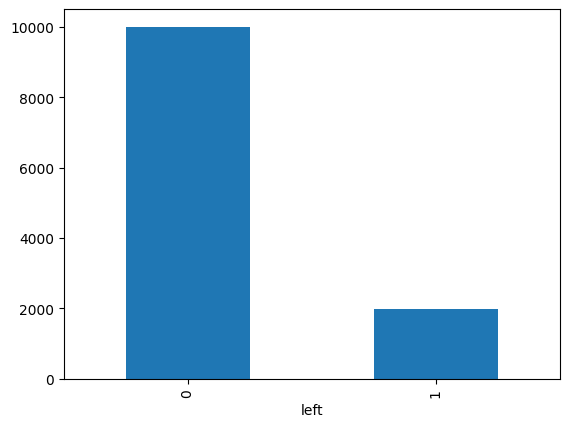

In [ ]:
data['left'].value_counts().plot(kind='bar')

by this we can determine that our dataset is imbalanced since one class has high number of observations and other class has low number of observation

# **Storing feature matrix in X and response or target in vector y**

In [ ]:
X = data.drop(columns=['left'])
y = data['left']

In [ ]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high
11996,0.74,0.95,5,266,10,0,1,management,high
11997,0.85,0.54,3,185,10,0,1,management,high
11998,0.33,0.65,3,172,10,0,1,marketing,high


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

# **Column Transformer and Pipeline**

In [ ]:
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


we observe that the scale used for number_project and average_monthly are different so standardization ensures that all features are equally important during model training

In [ ]:
# we are going to use standardscalar for all the numerical values available in the data set
# standardizing the numerical data using standardscalar
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident', 'promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])

],remainder='passthrough')

nominal features are those columns which have no inherent order or ranking like departments.We want to prevent the model from thinking one department is greater then other. Ordinal feature have inherent order i.e for example low, medium and high. OrdinalEncoder converts these categories to numerical values while preserving the order. By default other columns which are not mentioned in the column transformer will be dropped but we don't want to drop it here

# **Building a machine learning pipeline**

pipeline is a series of interconnected processing steps where the output of one step serves as the input to the next step. The main purpose of doing this is to streamline the entire process of execution

In [ ]:
# our preprocessor is the columntransformer
pipeline = Pipeline([('preprocessor',preprocessor),
         ('model',LogisticRegression())
         ])

we have sucessfully created the pipeline where the first step is preprocessor and the second step is model, i.e output of the first step will act as the input to the second step

# **Visualizing the pipeline**

In [ ]:
from sklearn import set_config

In [ ]:
set_config(display='diagram')

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

# **Splitting the dataset into Training set and Testing set**

here 20% of the dataset is used for testing and 80% is used for training also since out dataset is imbalanced dataset we need to use a parameter stratify which will ensure the class distribution in the original dataset is preserved in both training as well as testing subsets

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42,stratify=y)

In [ ]:
# training the created pipeline on X_train and y_train
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

# **Performing predictions on the created pipeline using unseen samples**

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
# accaccuracy_score(actual values, predicted values)
accuracy_score(y_test,y_pred)

0.8370154230929554

Logistic regression is around 0.8370154230929554 accurate

since our dataset is imbalanced we can't just rely on accuracy we need to check the precision as well

In [ ]:
precision_score(y_test,y_pred)

0.5209580838323353

the logistic regression model used is 52% precised

In [ ]:
recall_score(y_test,y_pred)

0.2185929648241206

compared to the accuracy score the precision as well as the recall scores are very less this is because our dataset is imbalanced

# **using other machine learning models in a single step**

In [ ]:
# def model_scorer(model_name, model instances)
def model_scorer(model_name,model):

    # creating an empty python list to store the accuracy, precision and recall score

    output=[]

    # we going to append the model name to the empty list

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor',preprocessor),
         ('model',model)])

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42,stratify=y)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(accuracy_score(y_test,y_pred))

    output.append(precision_score(y_test,y_pred))

    output.append(recall_score(y_test,y_pred))

    return output



# **Creating a python dictionary with different models in it**

In [ ]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
}

In [ ]:
model_output=[]
for model_name, model in model_dict.items():
    model_output.append(model_scorer(model_name, model))

In [ ]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9704043351396415, 0.8958837772397095, 0.9296482412060302],
 ['random_forest', 0.9858274280950396, 0.989247311827957, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

from the output we can determine that random forest is giving us the best result

# **Training the pipeline with random forest on the entire dataset**

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident', 'promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])

],remainder='passthrough')

In [ ]:
pipeline = Pipeline([('preprocessor',preprocessor),
         ('model',RandomForestClassifier())
         ])

In [ ]:
# training the pipeline with entire dataset
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

We have successfully trained our pipeline with the best model that is randomforestclassifier

In [ ]:
# dataframe used to predict
sample = pd.DataFrame({
    'satisfaction_level':0.38,
    'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'
},index=[0])

In [ ]:
result = pipeline.predict(sample)

if result ==1:
    print("This particular employee may leave the organization ")
else:
    print("This particular employee may stay with the organization")

This particular employee may leave the organization 


# **Save the model**

In [ ]:
import pickle

In [ ]:
with open('pipeline.pk1','wb') as f:
    pickle.dump(pipeline,f)

In [ ]:
with open('pipeline.pk1','rb') as f:
    pipeline_saved = pickle.load(f)

In [ ]:
result = pipeline_saved.predict(sample)

if result ==1:
    print("This particular employee may leave the organization ")
else:
    print("This particular employee may stay with the organization")

This particular employee may leave the organization 
